In [69]:
import numpy as np # for handling data  
import pandas as pd
import pytesseract

from datetime import datetime
from IPython.display import HTML, display
from PIL import Image

## working with pytesseract

### <font color=green>summary</font>
1. the [documentation](https://pypi.org/project/pytesseract/#description)
2. Is an OCR tool for Python that recognizes and reads text embeded in images and can read image types supported by PIL including:  jpeg, png, gif, [bmp](https://en.wikipedia.org/wiki/BMP_file_format), [tiff](https://en.wikipedia.org/wiki/TIFF)
3. Wrapper for [Google's OCR engine](https://opensource.google.com/projects/tesseract).....what they use for text detection on mobile devices and videos, Gmail image spam detection 
4. Key methods & parameters: 



* image_to_string
* image_to_pdf_or_hocr
* <b>lang</b>


In [25]:
epa_letter_file = 'data/pdf_data/epa-letter.pdf'
scanned_exhibit_file = 'data/pdf_data/Final Exhibit A to Equipment Lease #29.pdf'

### <font color=red>limitations</font>
1. pytesseract throws erros if your PDF is not an image even for scanned PDFs that functionally are non searchable pics of text documents.

**a place in the workflow for a script, function, module or manual labor to prepare image files for pytesseract**

```pytesseract.image_to_string(scanned_exhibit_file)```

![](images/pytesseract-error-msg.png)

can we open as image like docs?
```pytesseract.image_to_string(Image.open(scanned_exhibit_file))```

![](images/second-pytesseract-error.png)

```pytesseract.image_to_string(Image.open(epa_letter_file))```

![](images/third-pytesseract-error.png)

In [22]:
# using pdf2image for preprocessing
import pdf2image
epa_letter_file_img = pdf2image.convert_from_path(epa_letter_file)
epa_letter_file_img

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x117E31828>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x117E31748>]

In [29]:
type(epa_letter_file_img[0])

PIL.PpmImagePlugin.PpmImageFile

In [36]:
epa_letter_file_img

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x117E31828>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x117E31748>]

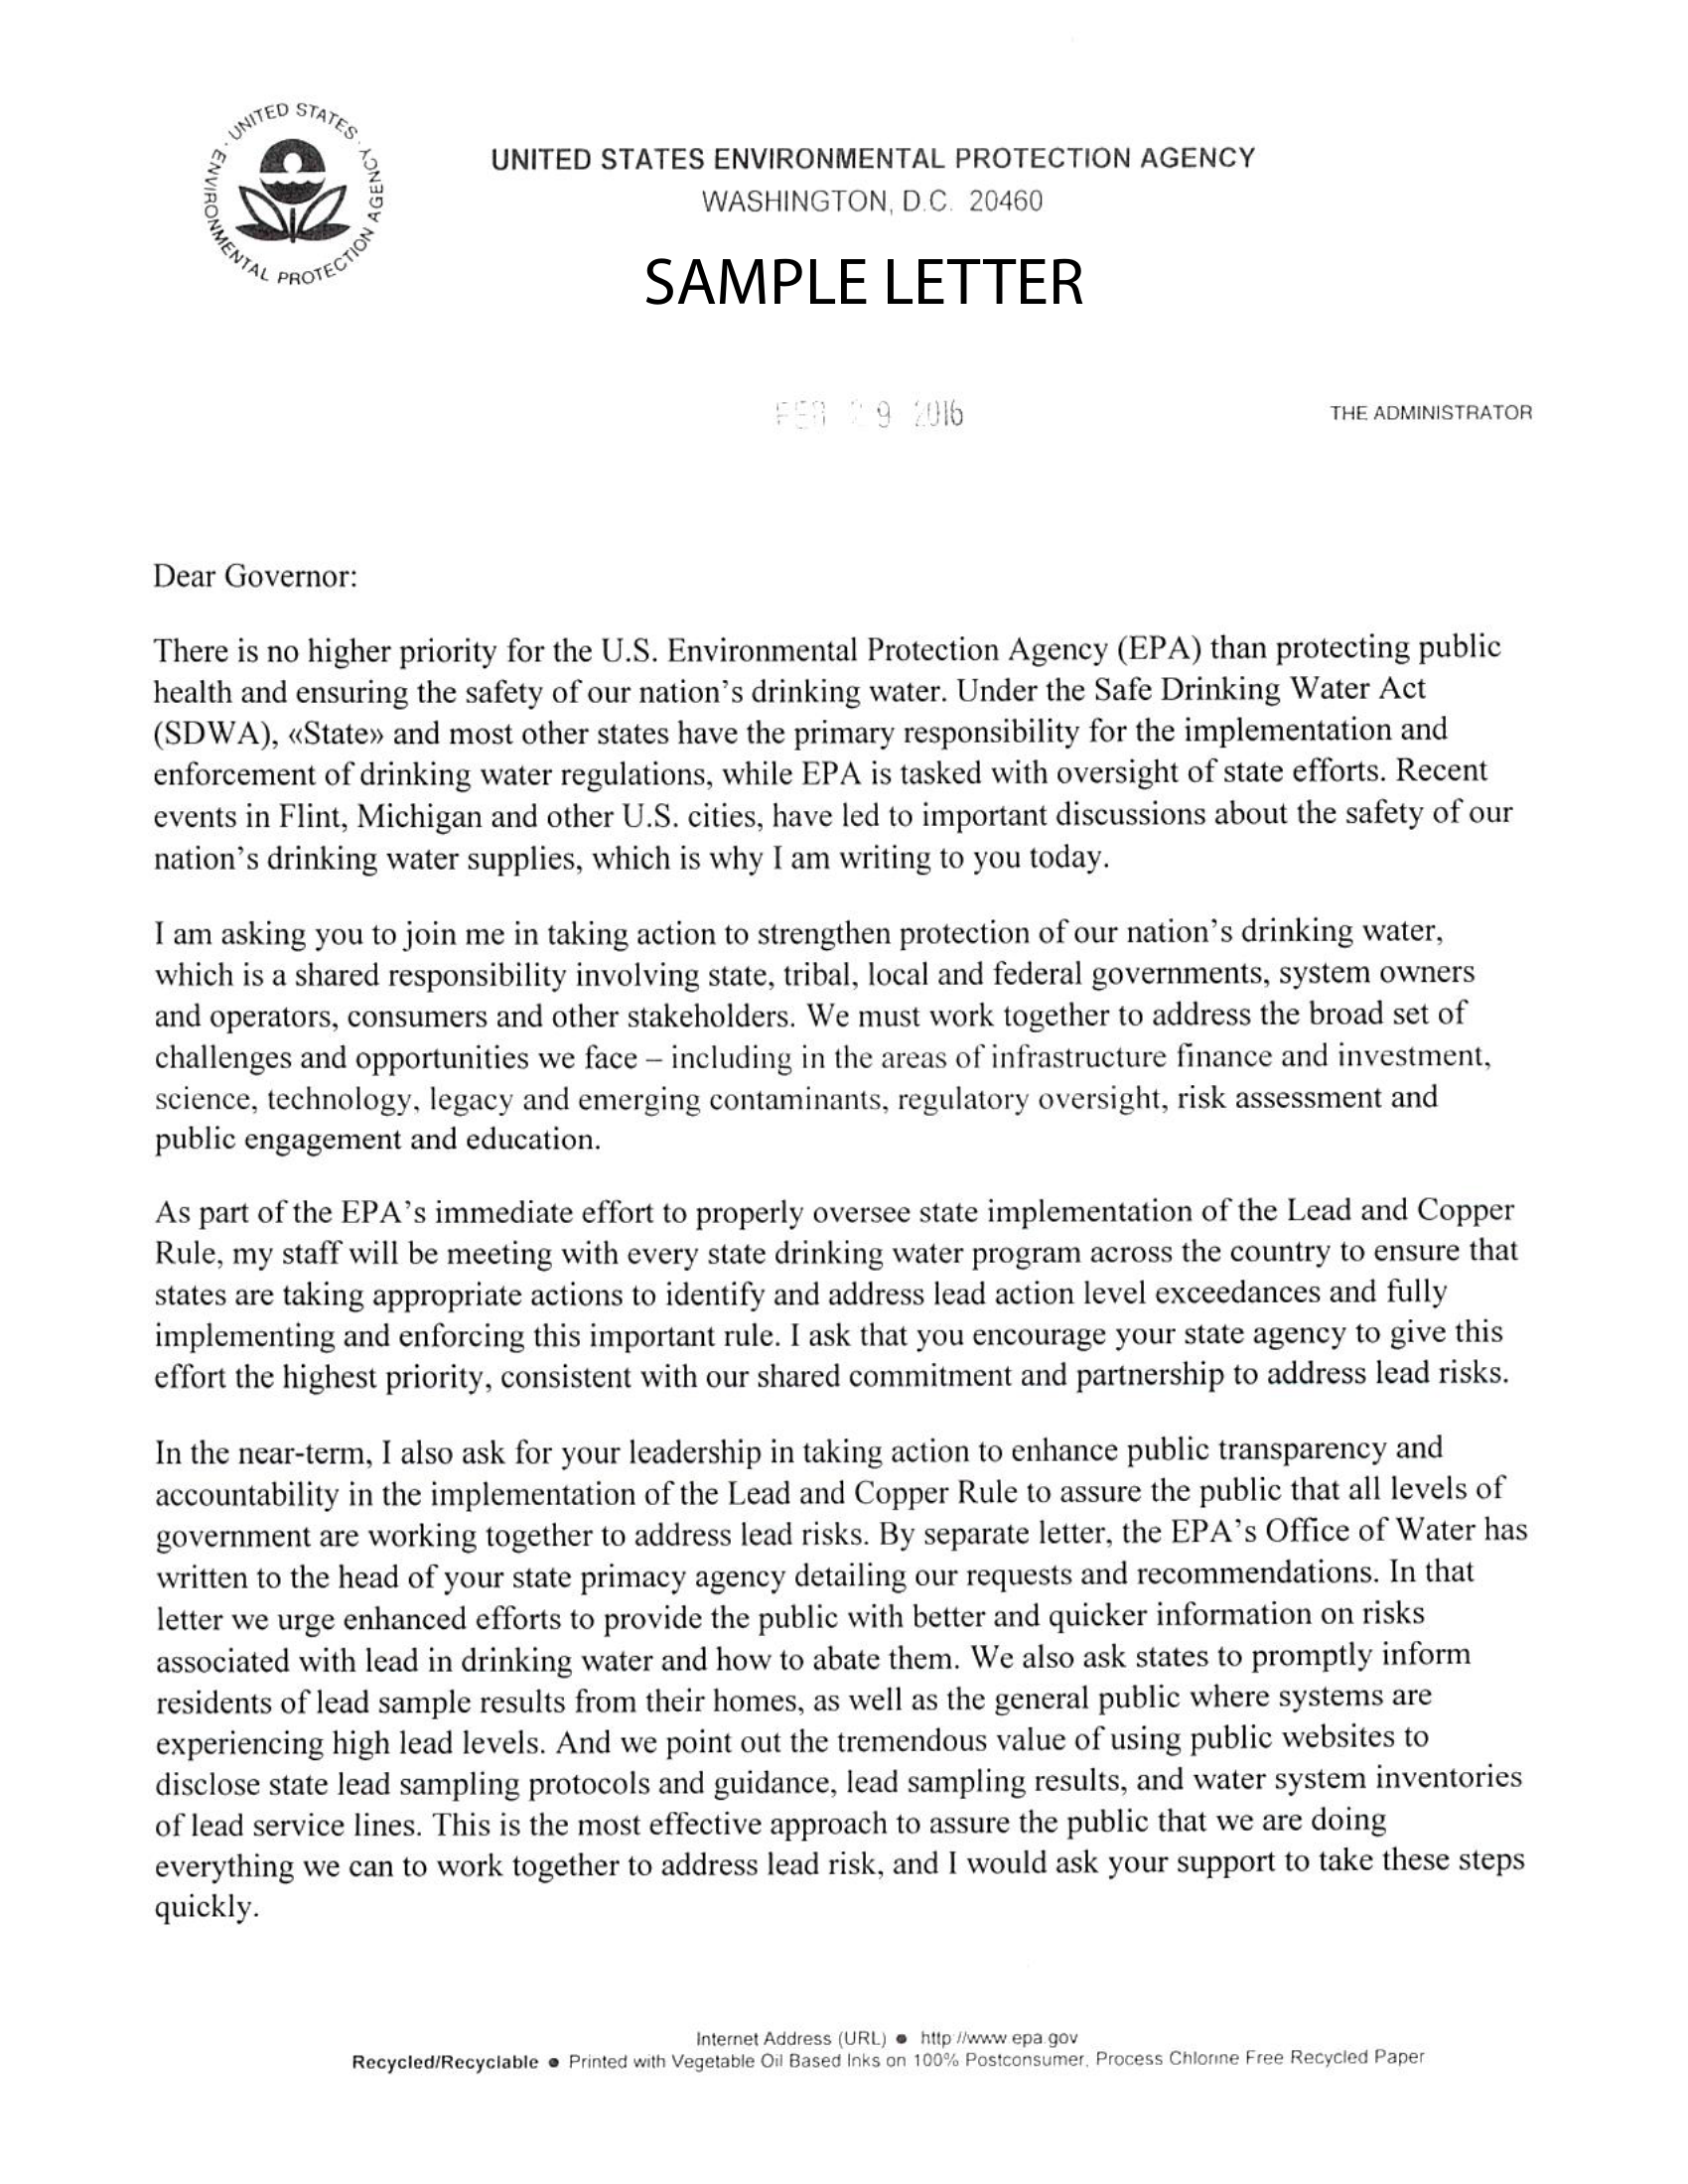

In [75]:
page1_epa_letter = epa_letter_file_img[0]
page1_epa_letter

In [38]:
scanned_exhibit_file_img = pdf2image.convert_from_path(scanned_exhibit_file)

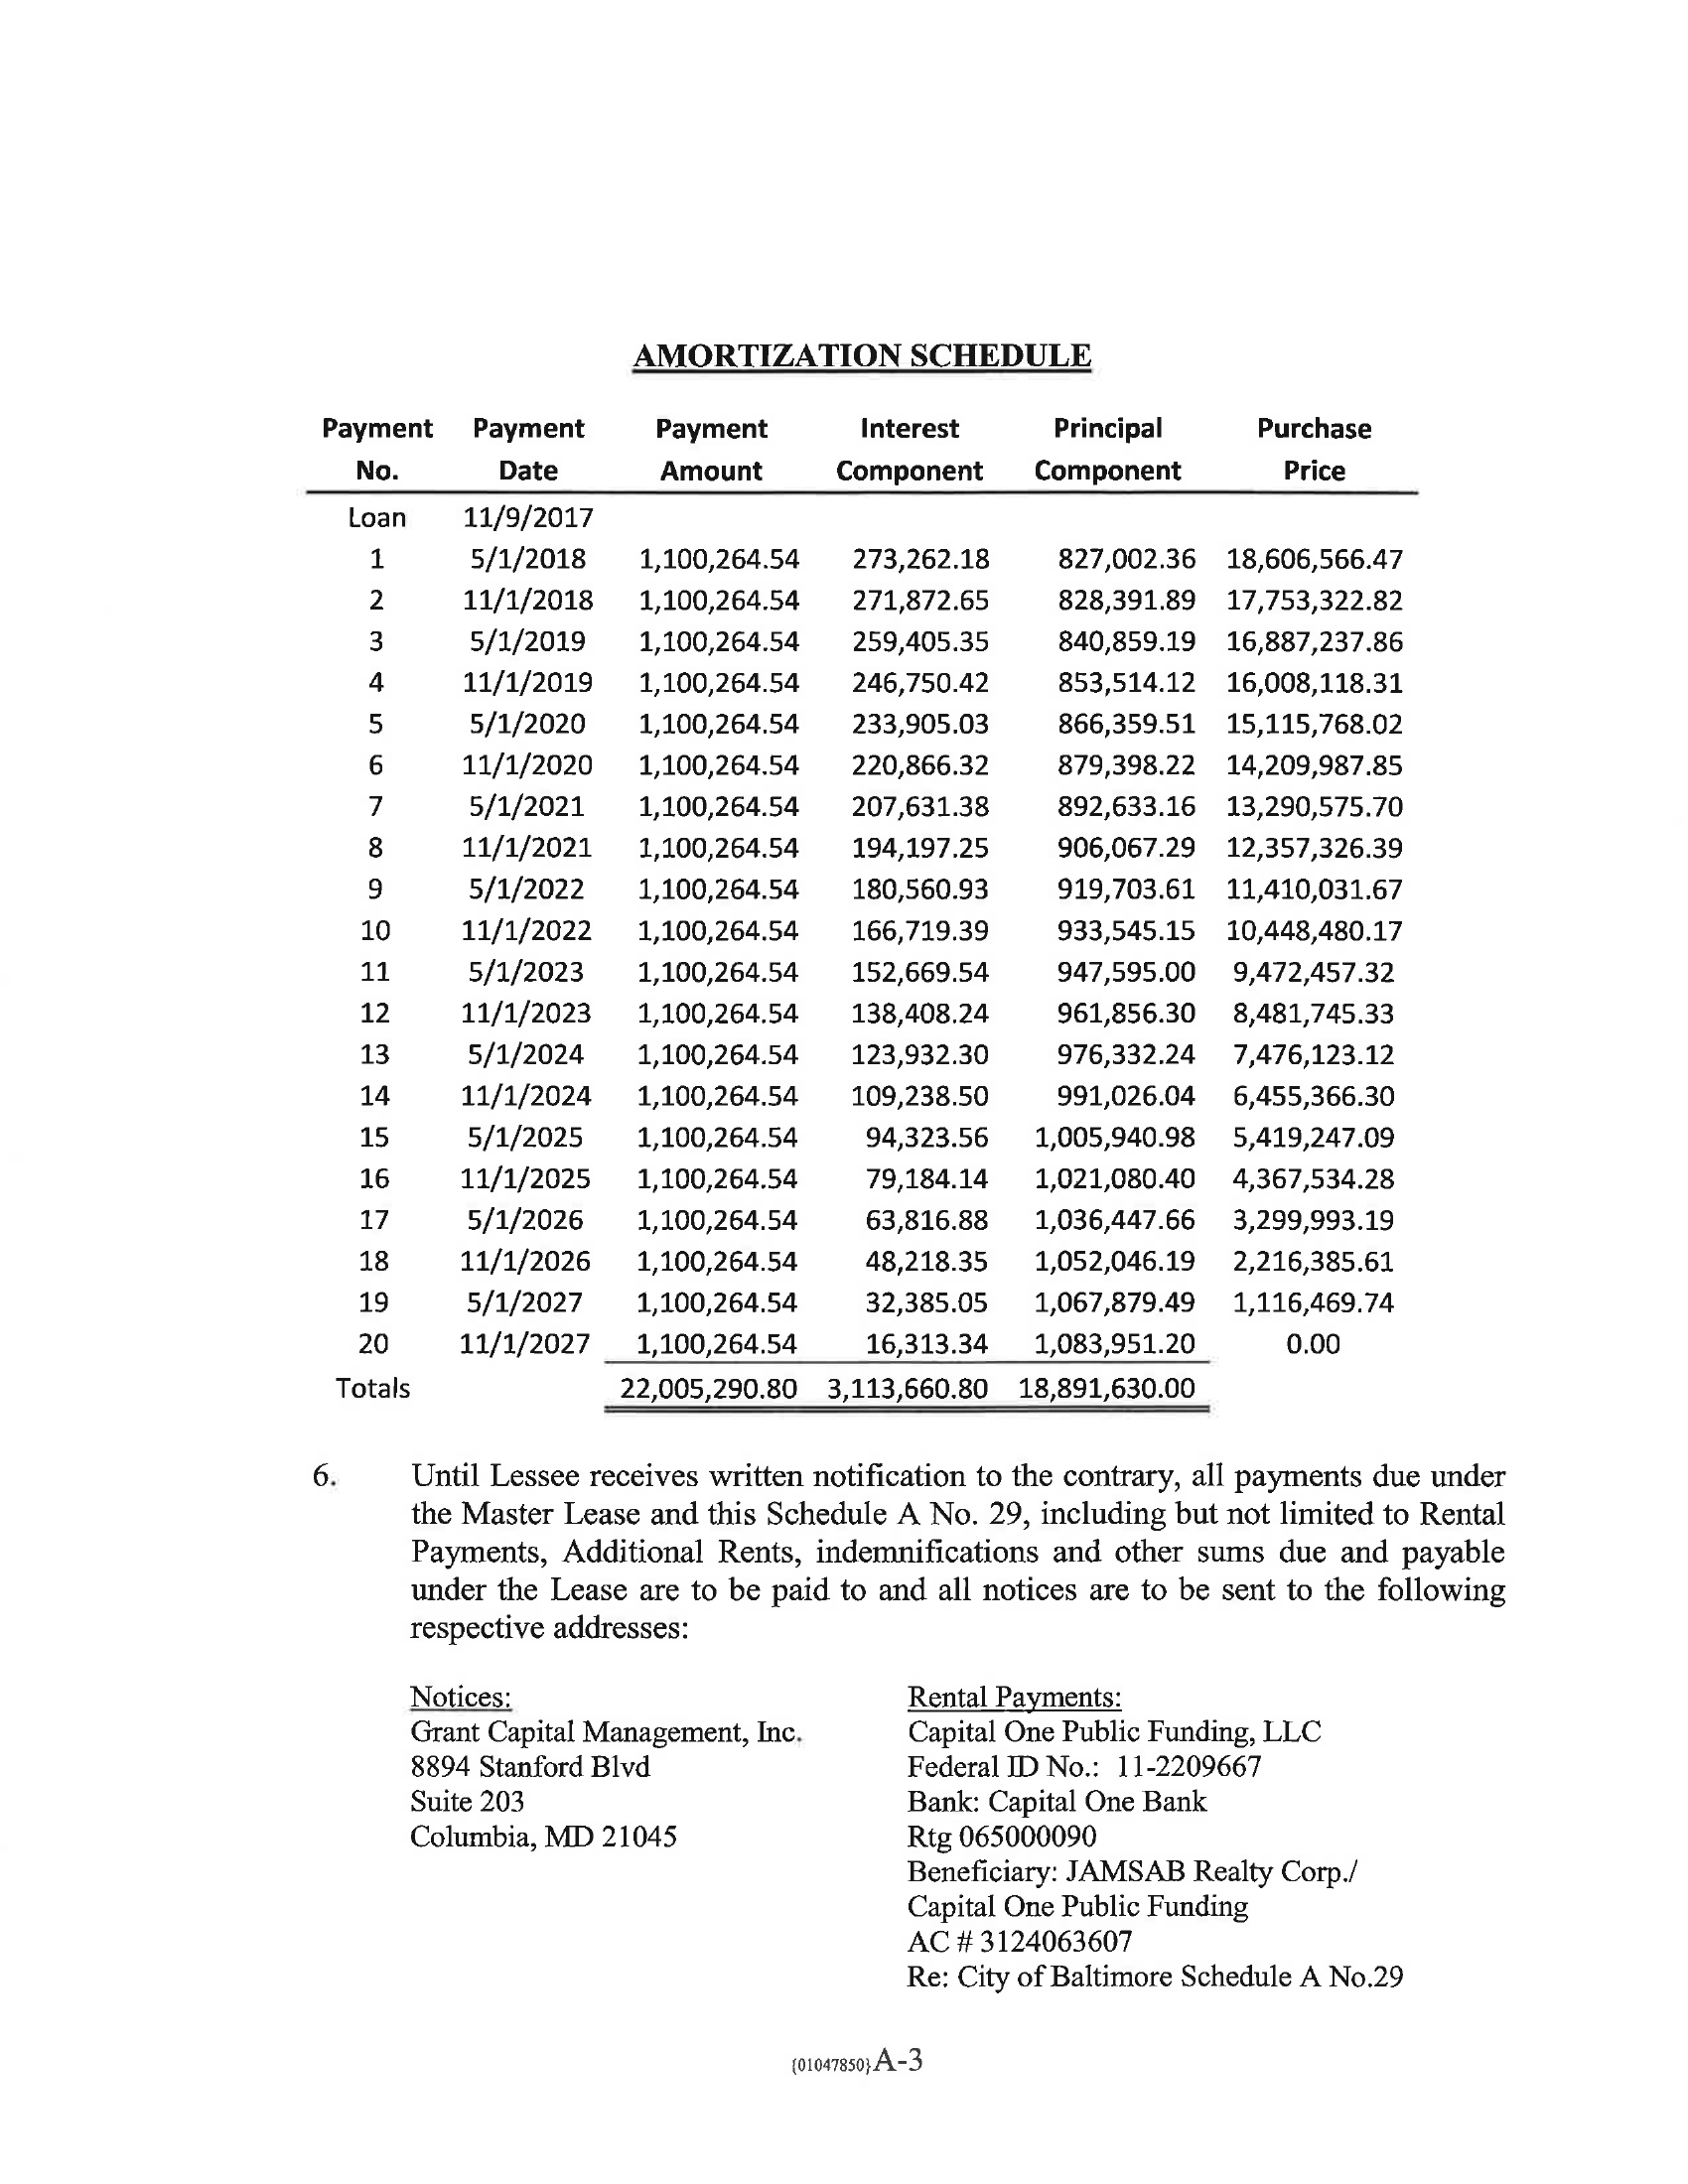

In [42]:
page4 = scanned_exhibit_file_img[3]
page4

In [147]:
!ls data/img_data/

Final Exhibit A to Equipment Lease #29.png
active-license-page1-10-18-2018.png
active-license-page2-10-18-2018.png
epa-letter.png
page4-10-17-2018-pdf2image.png


## document 1

In [76]:
# combining pdf2image & pytesseract but the underlying conversion algorithm doesn't produce predictable results
pytesseract.image_to_string(page1_epa_letter)

'UNITED STATES ENVIRONMENTAL PROTECTION AGENCY\nWASHINGTON, D C 20460\n\nSAMPLE LETTER\n\n\'r “lb THE ADMlNlSTRATOR\n\nDear Governor:\n\nThere is no higher priority for the US. Environmental Protection Agency (EPA) than protecting public\nhealth and ensuring the safety of our nation’s drinking water. Under the Safe Drinking Water Act\n(SDWA), «State» and most other states have the primary responsibility for the implementation and\nenforcement of drinking water regulations, while EPA is tasked with oversight of state efforts. Recent\nevents in Flint, Michigan and other US. cities, have led to important discussions about the safety of our\nnation’s drinking water supplies, which is why I am writing to you today.\n\nI am asking you to join me in taking action to strengthen protection ofour nation’s drinking water.\nwhich is a shared responsibility involving state, tribal. local and federal governments. system owners\nand operators, consumers and other stakeholders. We must work together t

In [88]:
firs_page_epa_letter =  pdf2image.convert_from_path(epa_letter_file)[0]

In [98]:
display(HTML("<table><tr><td><img src='images/pytesseract-first-page-epa-letter.png' width=1200, hieght=1200></td><td><img src='images/epa-first-page.png'></td></tr></table>"))

,


In [102]:
pytesseract.image_to_string(firs_page_epa_letter)

'UNITED STATES ENVIRONMENTAL PROTECTION AGENCY\nWASHINGTON, D C 20460\n\nSAMPLE LETTER\n\n\'r “lb THE ADMlNlSTRATOR\n\nDear Governor:\n\nThere is no higher priority for the US. Environmental Protection Agency (EPA) than protecting public\nhealth and ensuring the safety of our nation’s drinking water. Under the Safe Drinking Water Act\n(SDWA), «State» and most other states have the primary responsibility for the implementation and\nenforcement of drinking water regulations, while EPA is tasked with oversight of state efforts. Recent\nevents in Flint, Michigan and other US. cities, have led to important discussions about the safety of our\nnation’s drinking water supplies, which is why I am writing to you today.\n\nI am asking you to join me in taking action to strengthen protection ofour nation’s drinking water.\nwhich is a shared responsibility involving state, tribal. local and federal governments. system owners\nand operators, consumers and other stakeholders. We must work together t

## document 2

In [104]:
# combining pdf2image & pytesseract but the underlying conversion algorithm doesn't produce predictable results
# create an image file post conversion with pdf2image
page4.save('data/img_data/page4-{}-pdf2image.png'.format(datetime.now().strftime('%m-%d-%Y')),'png')
pytesseract.image_to_string('data/img_data/page4-10-17-2018-pdf2image.png')

'Payment Payment\n\nNo. Date\nLoan 11/9/2017\n1 5/1/2018\n2 1 1/1/2018\n3 5/1/2019\n4 11/1/2019\n5 5/1/2020\n6 11/1/2020\n7 5/ 1/ 202 1\n8 11/ 1/ 2021\n9 5/1/2022\n10 11/1/2022\n11 5/1/2023\n12 1 1/ 1/ 2023\n13 5/1/2024\n14 11/1/2024\n15 5/ 1/ 2025\n16 1 1/ 1/ 2025\n17 5/1/2026\n18 11/ 1/ 2026\n19 5/1/2027\n20 11/ 1/ 2027\nTotals\n\nUntil Lessee receives written notiﬁcation to the contrary, all payments due under\nthe Master Lease and this Schedule A No. 29, including but not limited to Rental\nPayments, Additional Rents, indemniﬁcations and other sums due and payable\nunder the Lease are to be paid to and all notices are to be sent to the following\n\nAMORTIZATION SCHEDULE\n\nPayment\nAmount\n\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n1,100,264.54\n22,005,290.80\n

In [105]:
# how does the underlying algorithm parse and return with pytesseract
# not easy to decipher pattern
display(HTML("<table><tr><td><img src='images/page4-image.png'></td><td><img src='images/pytesseract-imag2string-result.png'></tr></table>"))

""


## document 3

In [128]:
# using pdf2image to convert to images, save indivdual image pages 
# and convert image to string object for each page with pytesseract
for pg, item in enumerate(pdf2image.convert_from_path('data/pdf_data/active_licenses.pdf')):
    item.save('data/img_data/active-license-page{}-{}.png'.format(pg+1,datetime.now().strftime('%m-%d-%Y')), 'png')
    print('\n***** new page *****\n')
    print(pytesseract.image_to_string(item))


***** new page *****

FEBRUARY 2014 M27 (BUS)

LICENSE

NUMBER TYPE DBA NAME

648765 AAA

648766 AAA
82030 AAA

509462 AAA

509609 AAA

402986 AAA

79145 AAA
600941 AAA

478482 AAA
505981 AAA

429754 AAA

429755 AAA

415051 AAA
106719 AAA

625422 BAW

464828 BAW

184066 BAW

547693 BAW

428377 BAW

446957 BAW

632501 BAW

598515 BAW

618693 BAW

632575 BAW

543149 BAW

ALLEGIANT AIR

ALLEGIANT AIR
AMERICAN AIRLINES

AMERICAN AIRLINES

AMERICAN EAGLE

AMERICAN EAGLE

DELTA AIR LINES
ENDEAVOR AIR

EXPRESSJET AIRLINES
SKYWEST AIRLINES

SOUTHWEST AIRLINES
TULSA INTERNATIONAL
AIRPORT

UNITED AIRLINES
UNITED AIRLINES

A SENSU JAPANESE
RESTAURANT
ADAMO'S ROUTE 66
ITALIAN VILLA

AJANTA

AMERICINN OF SAYRE
ANDOLINI'S PIZZERIA &
ITALIAN RESTAURANT
ASAHI JAPANESE
RESTAURANT

BACK DOOR BARBECUE
BAMBOO THAI BISTRO
BANDANA RED'S
STEAKHOUSE

BASHU LEGENDS

BEDLAM BAR-B-Q

LICENSEE NAME
ALLEGIANT AIR LLC

ALLEGIANT AIR LLC
AMERICAN AIRLINES INC

AMERICAN AIRLINES INC
AMERICAN EAGLE
AIRLINES INC
AMERI

**In the conversion of the image to a text string, pytesseract chunks the text by what is perceives to be the column breaks with performance and outcome sensitive to spacing of text in the original PDF**

## <font color=orange>comparing performance of <font color=blue>pytesseract</font> to <font color=darkblue>camelot</font></font>
* reading <font color=blue><b>y</b></font> vs reading <font color=darkblue><b>x</b></font>

In [146]:
import camelot
camelot.read_pdf('data/pdf_data/active_licenses.pdf', flavor='stream')[0].data

[['FEBRUARY 2014 M27 (BUS)',
  '',
  '',
  'ALPHABETIC LISTING BY TYPE',
  '',
  '',
  '',
  'ABLPDM27'],
 ['', '', '', 'OF ACTIVE LICENSES', '', '', '', '3/19/2014'],
 ['', '', '', 'OKLAHOMA ABLE COMMISSION', '', '', '', ''],
 ['LICENSE', '', '', 'PREMISE', '', '', '', ''],
 ['NUMBER TYPE DBA NAME',
  '',
  'LICENSEE NAME',
  'ADDRESSCITY',
  'ST',
  'ZIP',
  'PHONE NUMBER',
  'EXPIRES'],
 ['648765 AAA',
  '',
  'ALLEGIANT AIR                    ALLEGIANT AIR LLC              7100 TERMINAL DRIVE          OKLAHOMA CITY',
  '',
  'OK',
  '73159',
  '-',
  '2014/12/03'],
 ['', '', '', '7777 EAST APACHE', '', '', '', ''],
 ['648766 AAA',
  '',
  'ALLEGIANT AIR                    ALLEGIANT AIR LLC',
  'STREET                 TULSA',
  'OK',
  '74115',
  '-',
  '2014/12/16'],
 ['82030 AAA',
  '',
  'AMERICAN AIRLINES           AMERICAN AIRLINES INC     7100 TERMINAL DRIVE          OKLAHOMA CITY',
  '',
  'OK',
  '73159',
  '(405) 680-3701',
  '2014/09/14'],
 ['509462 AAA',
  '',
  'AMERICAN